Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech</a>

# Read & Write files

## Contents

- Why read/write files
- File Types
- Read files
- Write files
- Append data to files
- Exceptions
- with statement

### Why read/write files

Files are probably the most used source of data in Data Science and Machine Learining. Although most of the time we use higher level libraries like <a href="https://ajaytech.co/numpy">NumPy</a> or <a href="https://ajaytech.co/pandas"/>Pandas</a> to read data from files, we also need to be aware of the basic Python read and write operations

### File Types

Typically, there are 2 types of files.

- text
- binary

We are not talking about special files like database dumps, Microsoft Word or Excel files etc which require special API to read. We are talking about general files like text files, images etc. Let's see how to read or write to these files. 

### Read files

There is a file in our data folder - steve_jobs.txt . It is a small snippet of a screenplay from the latest steve jobs movie. Let's read the file and display the contents on the screen. 

<div class="text-center">
    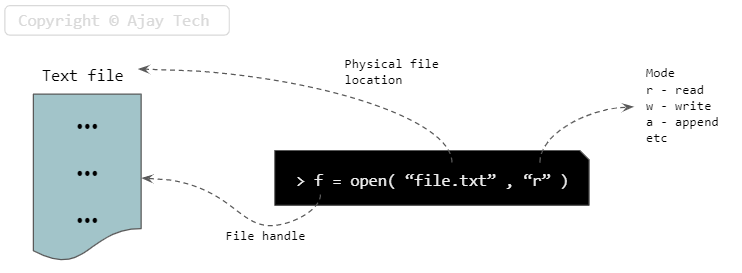
</div>

In [3]:
f = open ( "./data/steve_jobs.txt","r")

<div class="text-center">
    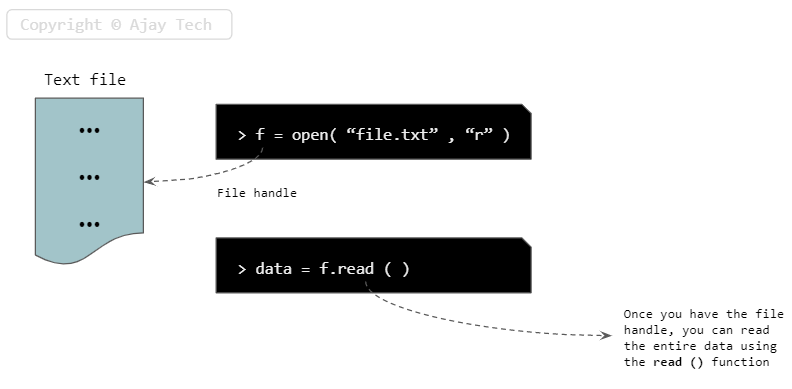
</div>

In [4]:
print ( f.read())

JOANNA : So what's the upshot?
ANDY : It's not gonna say "Hello."
STEVE : It absolutely is gonna say "Hello."
ANDY : It's nobody's fault, (it's a system error).
STEVE : (over) You built the voice demo.


Simple enough, right ? We have read the entire file. What if you want to read the file line by line ? Just use the **readline ( )** function. 

In [18]:
f.readline()

''

Why don't you see anything ? That is because when you printed the file in the previous block, you have exhausted the file stream already. There is nothing more to read. Let's try opening the file again and print the first line. 

In [19]:
f = open ( "./data/steve_jobs.txt","r")
f.readline()

"JOANNA : So what's the upshot?\n"

<div class="text-center">
    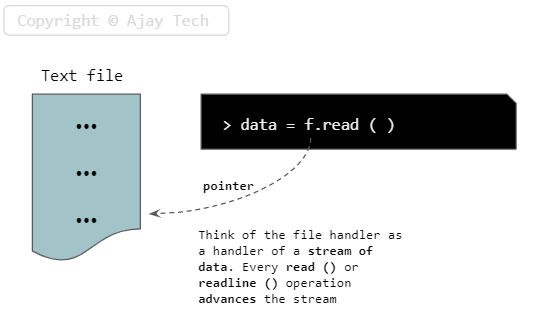
</div>

There you go - you got the first line from the file. As usual, you can use a for loop to read the file line by line and print it out. 

In [21]:
f = open ( "./data/steve_jobs.txt","r")
for line in f :
    print (line)

JOANNA : So what's the upshot?

ANDY : It's not gonna say "Hello."

STEVE : It absolutely is gonna say "Hello."

ANDY : It's nobody's fault, (it's a system error).

STEVE : (over) You built the voice demo.


**Quiz** - Can you figure out why there is an extra line of space between the lines ?

- The original file already has a newline for each line
- print statement in a for loop always prints an extra new line

OK - That was how you read text files. How about images ? We have the "Ajay Tech" logo in the pics folder. Let's try and read it like we have done before. 

In [26]:
f = open ( "./pics/ajay-tech-logo.png","r")
f.readline()

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 65: character maps to <undefined>

oops.. Python is complaining that it can't decode some characters in the image file. Files like images, pdf files, microsoft word documents are binary in nature and cannot be read using the regular "r" - read mode. To read binary files, just use the "rb" mode and you should be ok.

In [25]:
f = open ( "./pics/ajay-tech-logo.png","rb")
f.readline()

b'\x89PNG\r\n'

 Here is a list of all the <a href="https://docs.python.org/3/library/functions.html#open"> file opening modes </a>.

<pre>
'r' - read 
'w' - write
'x' - exclusive write. 
'a' - append ( to the end of file if it exists. Otherwise it is like a write )
't' - text mode
'b' - binary mode
'+' - read and write
</pre>

### Write files

Say, we do some image manipulation and write it back to another file. Well, we are not interested in image manipulation at this point, but we just want to understand how to write the data back to another file. To write files, just use the "w" mode in the **open ( )** function. 

In [30]:
f = open ( "./pics/ajay-tech-logo.png","rb")
data = f.read()

fw = open ( "./pics/ajay-tech-logo-1.png","wb")
fw.write(data)
fw.close()

You should now see 2 files - each exactly the same as another. 

<div class="text-center">
    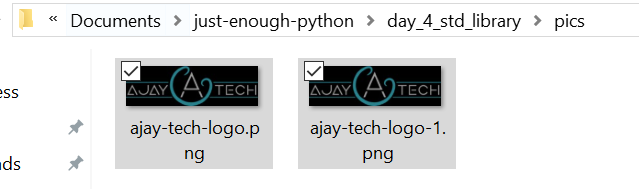
</div>

What about the new statement , **fw.close ( )** ? Let's see what happens if we don't close the file descriptor. 

In [32]:
f = open ( "./pics/ajay-tech-logo.png","rb")
data = f.read()

fw = open ( "./pics/ajay-tech-logo-1.png","wb")
fw.write(data)

20281

Try and open the file in explorer to see if the new file is ready - it should be. However, try deleting the file. You can't

<div class="text-center">
    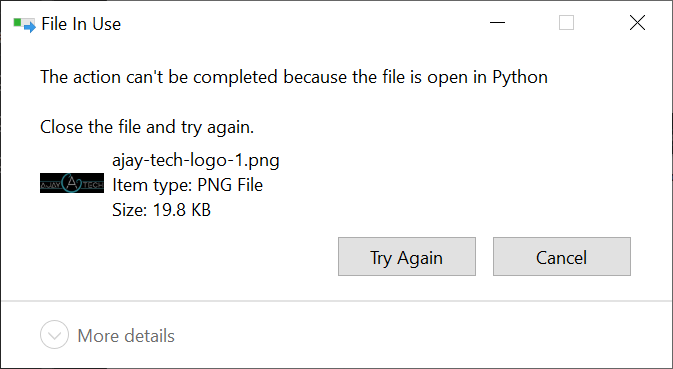
</div>

That is because, file operations ( especially write operations ) obtain an exclusive lock on the file. Meaning, only one process can write to a file and unless that write is complete, no other process can access the file for write or delete operations ( read is OK - that's why you were able to view the file ). In order to mark the write as complete, you would have to explicitly close the file handle. 

In [33]:
fw.close()

Now, you should be able to delete the file if required. 

### Append data to files

Sometimes, updating files need to be done in batches - For example, you might be writing the first half of the file in part 1 of the program and the second half of the file in part 2 of the program. One option is to keep the file open all the while in 'w' - write mode. If that is technically not possible ( some other program needs it in the meanwhile ), use the 'a' - append mode. 

append mode - **'a'**, is almost like a write ('w') except that if the file already exists, data is appended at the end of the file, instead of over-writing the existing data.  

<div class="text-center">
    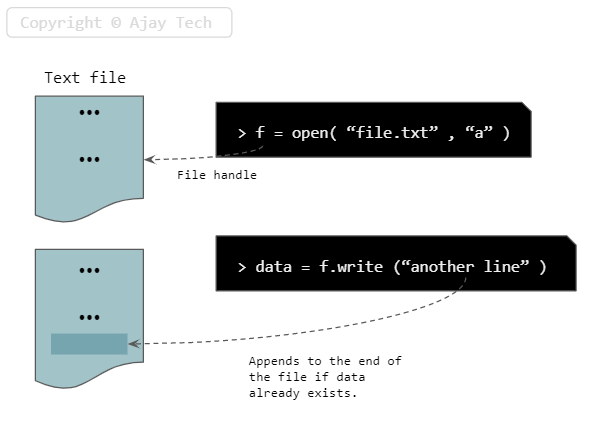
</div>

In [9]:
f = open ( "./data/steve_jobs.txt","a")
f.write("\na new dummy dialog")
f.close()

Just to make sure the append operation is succesful, let's read the file and print it out.

In [10]:
f = open("./data/steve_jobs.txt","r" )
print ( f.read())

JOANNA : So what's the upshot?
ANDY : It's not gonna say "Hello."
STEVE : It absolutely is gonna say "Hello."
ANDY : It's nobody's fault, (it's a system error).
STEVE : (over) You built the voice demo.a new dummy dialoga new dummy dialog
a new dummy dialog


### Exceptions

Like any other python program, errors could occur during reading or writing a file. For example, what happens if a file doesn't exist ?

In [11]:
f = open("./data/file_does_not_exist.txt","r" )

FileNotFoundError: [Errno 2] No such file or directory: './data/file_does_not_exist.txt'

Python throws a **FileNotFoundError**. Worse even, imagine a situation where you have opened a file and something went wrong during the processing - Who will close the file handle ?

In [15]:
f = open("./data/new_file.txt","w")
result = 1/0

ZeroDivisionError: division by zero

The file handler is still open. You can check it by calling the attribute **closed** on the file handle. 

In [17]:
f.closed

False

**False** , meaning the file is not closed. You can get around it by using **try/except** blocks as usual. 

In [29]:
try : 
    f = open("./data/new_file.txt","w")
    result = 1/0
except : 
    print ( "exception has occured")
    
finally :
    f.close()

exception has occured


In [30]:
print ( "file is closed - ", f.closed)

file is closed -  True


### with statement

An alternative to the **try/except** syntax, especially when dealing with external resources like files is the **with** statement. Think of it like syntactic sugar - making your syntax compact and sweet. 

<div class="text-center">
    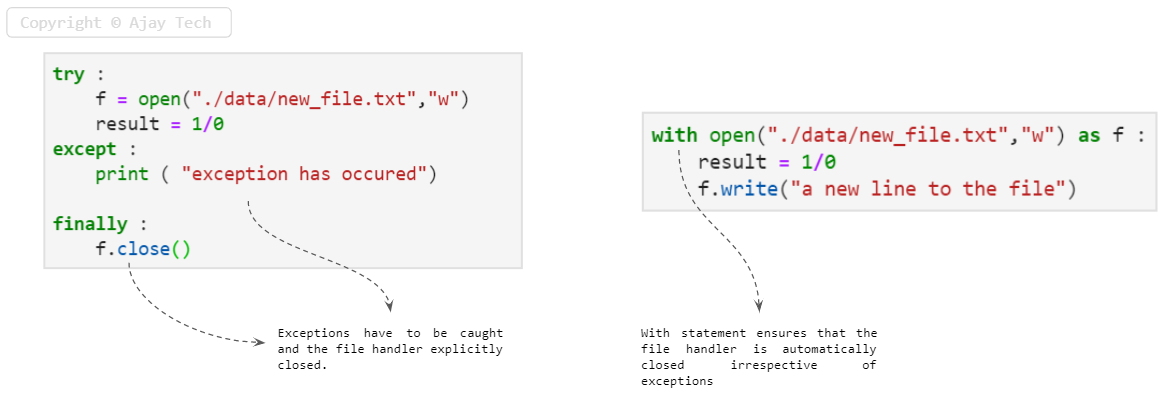
</div>

In [28]:
with open("./data/new_file.txt","w") as f :
    result = 1/0
    f.write("a new line to the file")

ZeroDivisionError: division by zero

Well, an exception has occured, but is the file handle closed or open ?

In [24]:
print ( "file is closed - ", f.closed)

file is closed -  True


The **with** statement ensures that the resources are closed even if an exception has occured. Of course, if you want to implement the **with** statement with your custom classes, you can do that as well. But in the interest of keeping the course simple, we will not deal with it here. 

In [1]:
# import bootstrap
from IPython.display import HTML
from urllib.request import urlopen
html = urlopen("https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta3/dist/css/bootstrap.min.css")
HTML('<style>' + html.read().decode('utf-8') + '</style>')
# bootstrap_icons = urlopen("https://cdn.jsdelivr.net/npm/bootstrap-icons@1.4.0/font/bootstrap-icons.css")
# HTML('<style>' + bootstrap_icons.read().decode('utf-8') + '</style>')

In [2]:
# Custom css classes for text highlighting (based on bootstrap.css)

from IPython.core.display import HTML
HTML("""
<style>

kbd { 
    background-color : black !important; 
    font-size : unset !important
}

.yellow { 
    background-color : #fff3cd !important; 
    color : black !important 
}

code { 
    border-radius : .2rem;
    background-color : white !important;
    border : solid 1px black !important
}

.jumbotron {
    background-color : #e9ecef;
    padding : 2rem 1rem;
    border-radius :.3rem
}

.list-group-flush {
    background-color : #e2e3e5 !important;
    padding-left : 0em !important;
}

.list-group-item {
    background-color : #e2e3e5; !important;
}

img {
    box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19) !important;
}

.bookmark {
    box-shadow : none !important;
    padding-bottom : .5rem !important;
}

.topic {
    font-size : 1.25rem !important;
}

.alert-info {
    background-color : #d1ecf1 !important;
    border-color : #bee5eb !important;
}

</style>
""")

In [3]:
# Make the notebook printer friendly by removing the prompts at the left of the code sections.
from IPython.core.display import HTML
HTML("""
<style>

.prompt { display : none;  } 

.jp-InputPrompt {
    color : white !important;
}

.jp-InputArea-prompt {
    color : white !important;
}
.jp-OutputPrompt{
    color : white !important;
}
.jp-OutputArea-prompt{
    color : white !important;
}

</style>
""")